## Sumber Data

### Deskripsi Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from wordcloud import WordCloud, ImageColorGenerator
df = pd.read_csv('ElonTweets(Sentiment).csv')
df.shape

(17602, 16)

### Karakteristik Data

#### Atribut pada file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17602 entries, 0 to 17601
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Datetime              17602 non-null  object 
 1   Tweet Id              17602 non-null  object 
 2   Text                  17602 non-null  object 
 3   Username              17602 non-null  object 
 4   location              0 non-null      float64
 5   reply count           17602 non-null  int64  
 6   retweet count         17602 non-null  int64  
 7   like count            17602 non-null  int64  
 8   language              17602 non-null  object 
 9   Twitter Access Point  17602 non-null  object 
 10  Follower Count        17602 non-null  int64  
 11  Friends Count         17602 non-null  int64  
 12  verified              17602 non-null  bool   
 13  Date                  17602 non-null  object 
 14  mentions              17602 non-null  object 
 15  sentiment          

##### Atribut Tambahan

In [4]:
df[['def', 'num']] = df['sentiment'].str.split(',', expand=True)
df['sentimentDef'] = df.loc[:, 'def'].map(lambda x: x.lstrip("['").rstrip("']"))
df['sentimentDef']
df['sentimentNum'] = pd.to_numeric(df.loc[:, 'num'].map(lambda x: x.lstrip("['").rstrip("']")))
df['sentimentNum']
df.loc[df["sentimentDef"] == "negative", "sentimentNum"] *= -1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17602 entries, 0 to 17601
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Datetime              17602 non-null  object 
 1   Tweet Id              17602 non-null  object 
 2   Text                  17602 non-null  object 
 3   Username              17602 non-null  object 
 4   location              0 non-null      float64
 5   reply count           17602 non-null  int64  
 6   retweet count         17602 non-null  int64  
 7   like count            17602 non-null  int64  
 8   language              17602 non-null  object 
 9   Twitter Access Point  17602 non-null  object 
 10  Follower Count        17602 non-null  int64  
 11  Friends Count         17602 non-null  int64  
 12  verified              17602 non-null  bool   
 13  Date                  17602 non-null  object 
 14  mentions              17602 non-null  object 
 15  sentiment          

## Analisis Data

### Data Cleansing

In [5]:
df.drop('location', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17602 entries, 0 to 17601
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Datetime              17602 non-null  object 
 1   Tweet Id              17602 non-null  object 
 2   Text                  17602 non-null  object 
 3   Username              17602 non-null  object 
 4   reply count           17602 non-null  int64  
 5   retweet count         17602 non-null  int64  
 6   like count            17602 non-null  int64  
 7   language              17602 non-null  object 
 8   Twitter Access Point  17602 non-null  object 
 9   Follower Count        17602 non-null  int64  
 10  Friends Count         17602 non-null  int64  
 11  verified              17602 non-null  bool   
 12  Date                  17602 non-null  object 
 13  mentions              17602 non-null  object 
 14  sentiment             17602 non-null  object 
 15  def                

### Statistik Data

#### Sampel data

In [6]:
df.head()

,Datetime,Tweet Id,Text,Username,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,def,num,sentimentDef,sentimentNum
0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,377,127,3007,en,Twitter for iPhone,107414837,122,True,2022-09-29,MuskUniversity,"['neutral', 0.6005306]",['neutral',0.6005306],neutral,0.600531
1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,1604,1416,33556,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['neutral', 0.8452575]",['neutral',0.8452575],neutral,0.845257
2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,754,492,23482,en,Twitter for iPhone,107414837,122,True,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]",['neutral',0.7530303],neutral,0.753030
3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,12870,9732,124276,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['positive', 0.6118259]",['positive',0.6118259],positive,0.611826
4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,509,347,8189,en,Twitter for iPhone,107414837,122,True,2022-09-29,phibetakitten,"['neutral', 0.85970926]",['neutral',0.85970926],neutral,0.859709


#### Perhitungan Statistik Data

In [7]:
df.describe()

,reply count,retweet count,like count,Follower Count,Friends Count,sentimentNum
count,17602.000000,17602.000000,1.760200e+04,1.760200e+04,17602.0,17602.000000
mean,1555.814737,2913.791785,3.154220e+04,1.074143e+08,122.0,0.551210
std,5917.449731,12432.194000,1.044724e+05,1.028138e+03,0.0,0.474273
min,0.000000,0.000000,2.000000e+00,1.074129e+08,122.0,-0.975293
25%,64.000000,67.000000,1.246000e+03,1.074134e+08,122.0,0.537998
50%,220.000000,262.000000,4.533500e+03,1.074137e+08,122.0,0.667097
75%,766.000000,1169.000000,1.760750e+04,1.074154e+08,122.0,0.826489
max,194791.000000,686210.000000,4.799760e+06,1.074158e+08,122.0,0.992991


In [8]:
print(df['Follower Count'].quantile(q=0.1))
print(df['Follower Count'].quantile(q=0.9))
print(df['reply count'].quantile(q=0.1))
print(df['reply count'].quantile(q=0.9))
print(df['like count'].quantile(q=0.1))
print(df['like count'].quantile(q=0.9))
print(df['retweet count'].quantile(q=0.1))
print(df['retweet count'].quantile(q=0.9))
print(df['sentimentNum'].quantile(q=0.1))
print(df['sentimentNum'].quantile(q=0.9))

107413099.0
107415611.0
26.0
2817.499999999998
480.0
71930.69999999997
25.0
5622.499999999998
-0.516456273
0.922997073


##### Tweet Terpopuler

In [9]:
df. sort_values (["like count", "retweet count", "reply count"], ascending =[0, 0, 0]).head()

,Datetime,Tweet Id,Text,Username,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,def,num,sentimentDef,sentimentNum
1768,2022-04-28 00:56:58+00:00,1519480761749016577,Next I’m buying Coca-Cola to put the cocaine b...,elonmusk,194791,686210,4799760,en,Twitter for iPhone,107415017,122,True,2022-04-28,_,"['neutral', 0.5308432]",['neutral',0.5308432],neutral,0.530843
1793,2022-04-25 16:12:30+00:00,1518623997054918657,I hope that even my worst critics remain on Tw...,elonmusk,181992,371785,3249561,en,Twitter for iPhone,107412993,122,True,2022-04-25,_,"['neutral', 0.48115146]",['neutral',0.48115146],neutral,0.481151
1765,2022-04-28 01:53:50+00:00,1519495072802390016,Let’s make Twitter maximum fun!,elonmusk,115703,196683,2665051,en,Twitter for iPhone,107415017,122,True,2022-04-28,_,"['positive', 0.9475379]",['positive',0.9475379],positive,0.947538
1792,2022-04-25 19:43:22+00:00,1518677066325053441,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,elonmusk,151580,351882,2621826,und,Twitter for iPhone,107412993,122,True,2022-04-25,_,"['positive', 0.97581434]",['positive',0.97581434],positive,0.975814
1764,2022-04-28 01:57:27+00:00,1519495982723084290,"Listen, I can’t do miracles ok https://t.co/z7...",elonmusk,77882,214526,2593314,en,Twitter for iPhone,107415017,122,True,2022-04-28,_,"['negative', 0.6609713]",['negative',0.6609713],negative,-0.660971


In [10]:
imax = (df["like count"]+df["retweet count"]+df["reply count"]).idxmax()
df[imax:imax + 1]["Text"]

1768    Next I’m buying Coca-Cola to put the cocaine b...
Name: Text, dtype: object

In [11]:
df.loc[df['sentiment'].str.contains("'positive'")]. sort_values (["like count", "retweet count", "reply count"], ascending =[0, 0, 0]).head()

,Datetime,Tweet Id,Text,Username,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,def,num,sentimentDef,sentimentNum
1765,2022-04-28 01:53:50+00:00,1519495072802390016,Let’s make Twitter maximum fun!,elonmusk,115703,196683,2665051,en,Twitter for iPhone,107415017,122,True,2022-04-28,_,"['positive', 0.9475379]",['positive',0.9475379],positive,0.947538
1792,2022-04-25 19:43:22+00:00,1518677066325053441,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,elonmusk,151580,351882,2621826,und,Twitter for iPhone,107412993,122,True,2022-04-25,_,"['positive', 0.97581434]",['positive',0.97581434],positive,0.975814
1930,2022-04-14 21:40:23+00:00,1514720245113577473,i♥️u,elonmusk,88401,85803,1196917,qst,Twitter for iPhone,107412998,122,True,2022-04-14,_,"['positive', 0.89747566]",['positive',0.89747566],positive,0.897476
1616,2022-05-09 13:35:52+00:00,1523658010241155073,Chocolate milk is insanely good. Just had some.,elonmusk,72037,76730,1146742,en,Twitter for iPhone,107412981,122,True,2022-05-09,_,"['positive', 0.98506415]",['positive',0.98506415],positive,0.985064
5637,2021-02-04 07:57:30+00:00,1357236825589432322,ur welcome https://t.co/e2KF57KLxb,elonmusk,22118,135623,942026,en,Twitter Web App,107413183,122,True,2021-02-04,_,"['positive', 0.8732155]",['positive',0.8732155],positive,0.873216


In [12]:
df.loc[df['sentiment'].str.contains("'negative'")]. sort_values (["like count", "retweet count", "reply count"], ascending =[0, 0, 0]).head()

,Datetime,Tweet Id,Text,Username,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,def,num,sentimentDef,sentimentNum
1764,2022-04-28 01:57:27+00:00,1519495982723084290,"Listen, I can’t do miracles ok https://t.co/z7...",elonmusk,77882,214526,2593314,en,Twitter for iPhone,107415017,122,True,2022-04-28,_,"['negative', 0.6609713]",['negative',0.6609713],negative,-0.660971
1789,2022-04-26 18:26:46+00:00,1519020176884305920,The extreme antibody reaction from those who f...,elonmusk,80960,195514,1663968,en,Twitter for iPhone,107412993,122,True,2022-04-26,_,"['negative', 0.81757265]",['negative',0.81757265],negative,-0.817573
8799,2020-03-06 20:42:39+00:00,1236029449042198528,The coronavirus panic is dumb,elonmusk,41380,278255,1508332,en,Twitter for iPhone,107413404,122,True,2020-03-06,_,"['negative', 0.9256429]",['negative',0.9256429],negative,-0.925643
1743,2022-04-29 12:28:10+00:00,1520017094007476224,"The far left hates everyone, themselves included!",elonmusk,63167,123134,1188617,en,Twitter for iPhone,107412909,122,True,2022-04-29,_,"['negative', 0.9550916]",['negative',0.9550916],negative,-0.955092
1583,2022-05-12 22:45:27+00:00,1524883482836623373,Biden’s mistake is that he thinks he was elect...,elonmusk,61843,94974,1085834,en,Twitter for iPhone,107412909,122,True,2022-05-12,_,"['negative', 0.6594271]",['negative',0.6594271],negative,-0.659427


### Korelasi Data

In [13]:
df[["reply count", "retweet count", "like count", "Follower Count", "Friends Count", "sentimentNum"]].corr()

,reply count,retweet count,like count,Follower Count,Friends Count,sentimentNum
reply count,1.000000,0.737151,0.821201,-0.057401,NaN,-0.039163
retweet count,0.737151,1.000000,0.918919,-0.028244,NaN,-0.046045
like count,0.821201,0.918919,1.000000,-0.052614,NaN,-0.032862
Follower Count,-0.057401,-0.028244,-0.052614,1.000000,NaN,0.021959
Friends Count,NaN,NaN,NaN,NaN,NaN,NaN
sentimentNum,-0.039163,-0.046045,-0.032862,0.021959,NaN,1.000000


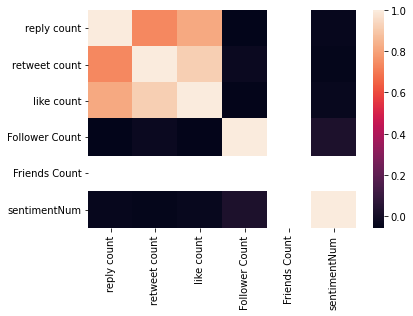

In [14]:
sns.heatmap(df[["reply count", "retweet count", "like count", "Follower Count", "Friends Count", "sentimentNum"]].corr())

### Visualisasi Data

#### Perbandingan Kategori

Text(0, 0.5, 'Jumlah penggunaan')

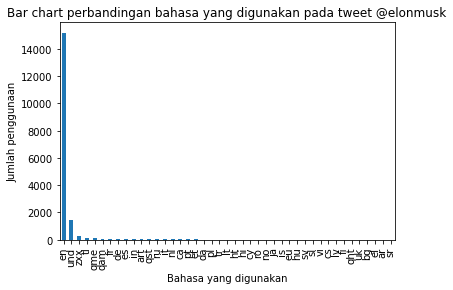

In [15]:
df["language"].value_counts ().plot(kind = "bar", title="Bar chart perbandingan bahasa yang digunakan pada tweet @elonmusk")
plt.xlabel('Bahasa yang digunakan')
plt.ylabel('Jumlah penggunaan')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(-0.5, 399.5, 199.5, -0.5)

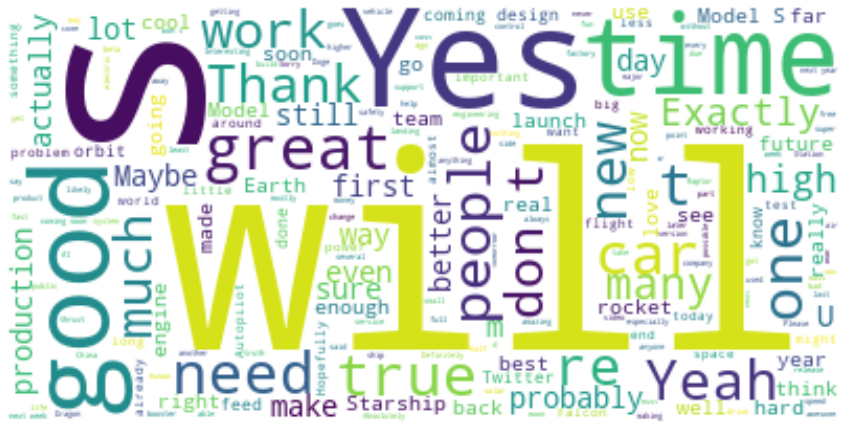

In [16]:
# Membersihkan kolom "Text" pada DataFrame
import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
 
def cleaner(tweet):
   tweet = re.sub("@[A-Za-z0-9]+","",tweet)
   tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
   tweet = " ".join(tweet.split())
   tweet = tweet.replace("#", "").replace("_", " ")
   tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
        if w.lower() in words or not w.isalpha())
   return tweet
df['Text'] = df['Text'].map(lambda x: cleaner(x))

#Menampilkan WordCloud
from wordcloud import STOPWORDS
text = " ".join(i for i in df.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Penampilan Perubahan Terhadap Waktu

##### Jumlah Tweet

Text(0, 0.5, 'Jumlah tweet')

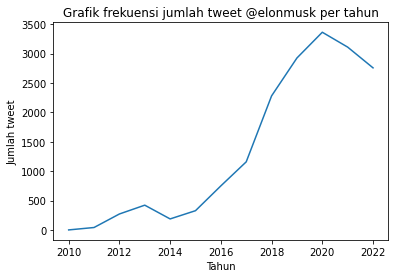

In [17]:
df.groupby(pd.to_datetime(df['Datetime']).dt.strftime('%Y'), sort=True)['Text'].size().plot(title="Grafik frekuensi jumlah tweet @elonmusk per tahun")
plt.xlabel('Tahun')
plt.ylabel('Jumlah tweet')

Text(0, 0.5, 'Jumlah tweet')

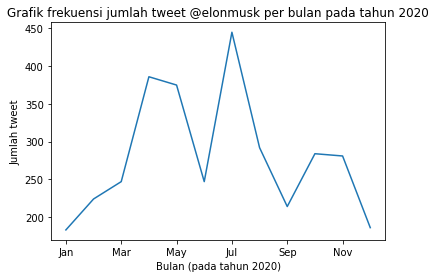

In [18]:
df_time = pd.to_datetime(df['Datetime'])
df.loc[df_time.dt.strftime('%Y') == '2020'].groupby(df_time.dt.strftime('%b'), sort=False)['Text'].size().iloc[::-1].plot(title="Grafik frekuensi jumlah tweet @elonmusk per bulan pada tahun 2020")
plt.xlabel('Bulan (pada tahun 2020)')
plt.ylabel('Jumlah tweet')

Text(0, 0.5, 'Jumlah tweet')

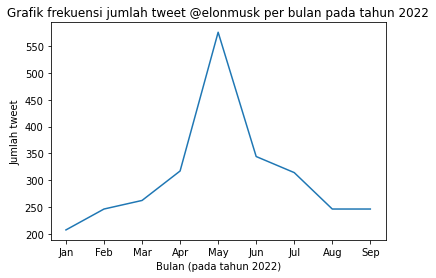

In [19]:
df_time = pd.to_datetime(df['Datetime'])
df.loc[df_time.dt.strftime('%Y') == '2022'].groupby(df_time.dt.strftime('%b'), sort=False)['Text'].size().iloc[::-1].plot(title="Grafik frekuensi jumlah tweet @elonmusk per bulan pada tahun 2022")
plt.xlabel('Bulan (pada tahun 2022)')
plt.ylabel('Jumlah tweet')

##### Nilai Sentiment

Text(0.5, 1.0, 'Grafik perubahan sentiment per tahun')

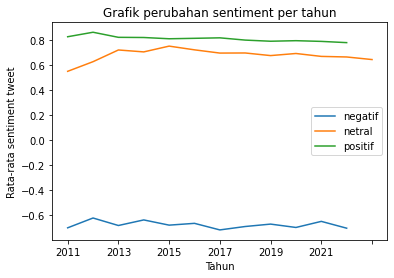

In [20]:
neg_df1 = df.loc[df["sentimentDef"] == "negative"].groupby(pd.to_datetime(df['Datetime']).dt.strftime('%Y'), sort=True)['sentimentNum'].mean()
neu_df2 = df.loc[df["sentimentDef"] == "neutral"].groupby(pd.to_datetime(df['Datetime']).dt.strftime('%Y'), sort=True)['sentimentNum'].mean()
pos_df3 = df.loc[df["sentimentDef"] == "positive"].groupby(pd.to_datetime(df['Datetime']).dt.strftime('%Y'), sort=True)['sentimentNum'].mean()
neg_df1.plot(kind='line', label="negatif").legend()
neu_df2.plot(kind='line', label="netral").legend()
pos_df3.plot(kind='line', label="positif").legend()
plt.xlabel('Tahun')
plt.ylabel('Rata-rata sentiment tweet')
plt.title('Grafik perubahan sentiment per tahun')

Text(0.5, 1.0, 'Grafik perubahan sentiment per bulan pada tahun 2022')

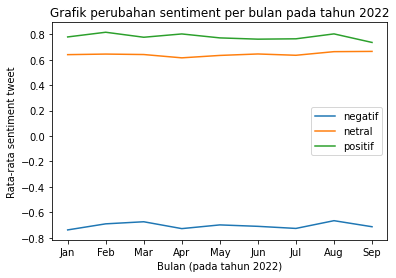

In [21]:
df_time = pd.to_datetime(df['Datetime']).dt
neg_df1 = df.loc[(df["sentimentDef"] == "negative") &  (df_time.strftime('%Y') == '2022')].groupby(pd.to_datetime(df['Datetime']).dt.strftime('%b'), sort=False)['sentimentNum'].mean().iloc[::-1]
neu_df2 = df.loc[(df["sentimentDef"] == "neutral") & (df_time.strftime('%Y') == '2022')].groupby(pd.to_datetime(df['Datetime']).dt.strftime('%b'), sort=False)['sentimentNum'].mean().iloc[::-1]
pos_df3 = df.loc[(df["sentimentDef"] == "positive") & (df_time.strftime('%Y') == '2022')].groupby(pd.to_datetime(df['Datetime']).dt.strftime('%b'), sort=False)['sentimentNum'].mean().iloc[::-1]
neg_df1.plot(kind='line', label="negatif").legend()
neu_df2.plot(kind='line', label="netral").legend()
pos_df3.plot(kind='line', label="positif").legend()
plt.xlabel('Bulan (pada tahun 2022)')
plt.ylabel('Rata-rata sentiment tweet')
plt.title('Grafik perubahan sentiment per bulan pada tahun 2022')

##### Jumlah Retweet

Text(0, 0.5, 'Total retweet')

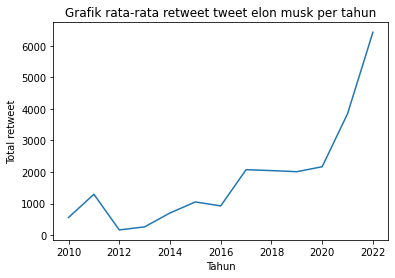

In [22]:
df.groupby(pd.to_datetime(df['Datetime']).dt.strftime('%Y'), sort=True)['retweet count'].mean().plot(title="Grafik rata-rata retweet tweet elon musk per tahun")
plt.xlabel('Tahun')
plt.ylabel('Total retweet')

Text(0, 0.5, 'Total retweet')

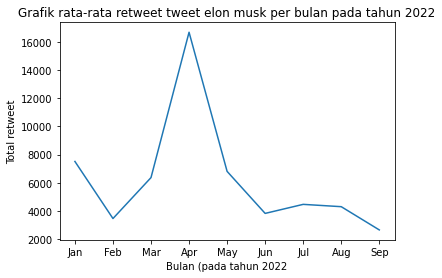

In [23]:
df_time = pd.to_datetime(df['Datetime']).dt
df.loc[df_time.strftime('%Y') == '2022'].groupby(df_time.strftime('%b'), sort=False)['retweet count'].mean().iloc[::-1].plot(title="Grafik rata-rata retweet tweet elon musk per bulan pada tahun 2022")
plt.xlabel('Bulan (pada tahun 2022')
plt.ylabel('Total retweet')

#### Penampilan hierarki dan hubungan keseluruhan-bagian 

Text(0, 0.5, 'Jumlah Tweet')

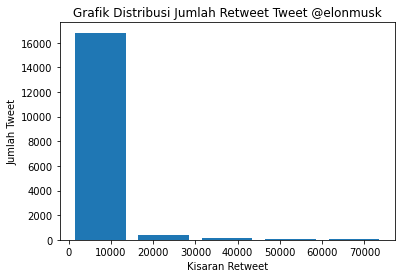

In [24]:
df["retweet count"].plot(kind="hist",bins =[0 ,15000 ,30000 ,45000 ,60000 ,75000] , title="Grafik Distribusi Jumlah Retweet Tweet @elonmusk", rwidth =0.8)
plt.xlabel('Kisaran Retweet')
plt.ylabel('Jumlah Tweet')

Text(0, 0.5, 'Jumlah Tweet')

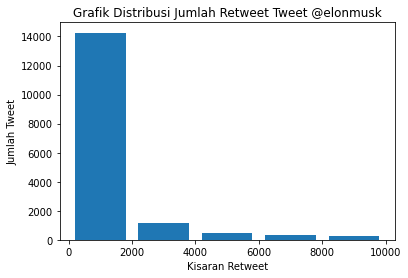

In [25]:
df["retweet count"].plot(kind="hist",bins =[0 ,2000 ,4000 ,6000 ,8000 ,10000] , title="Grafik Distribusi Jumlah Retweet Tweet @elonmusk", rwidth =0.8)
plt.xlabel('Kisaran Retweet')
plt.ylabel('Jumlah Tweet')

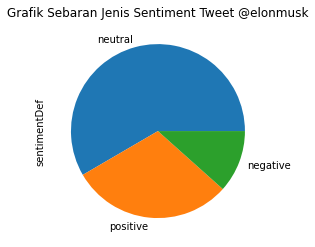

In [26]:
df["sentimentDef"].value_counts().plot(kind = "pie", title="Grafik Sebaran Jenis Sentiment Tweet @elonmusk")

### Plotting relationships area plot

Text(0, 0.5, 'Jumlah Retweet')

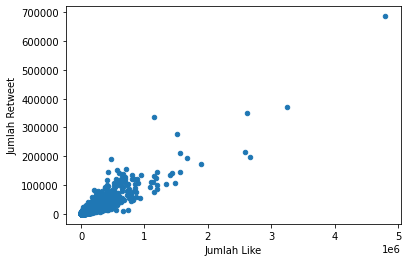

In [27]:
df.plot(kind="scatter", x="like count", y="retweet count")
plt.xlabel('Jumlah Like')
plt.ylabel('Jumlah Retweet')

Text(0, 0.5, 'Nilai Sentiment')

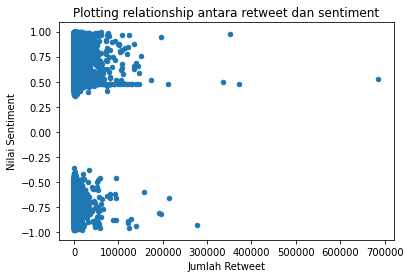

In [28]:
df.plot(kind="scatter", x="retweet count", y="sentimentNum", title="Plotting relationship antara retweet dan sentiment")
plt.xlabel('Jumlah Retweet')
plt.ylabel('Nilai Sentiment')